## Module 4 Autograded Assignment

It's time to wrap up Module 4. Let's see what we have learned!

Please do not add or delete cells as this may affect the autograder.

In [ ]:
# Load Necesary Packages
library(testthat)

# Problem 1

You've been having some trouble sleeping, and have resorted to the time-honored tradition of counting sheep. Being a budding data scientist, you decide to track the number of sheep you count each night. Historically, it is known that, on average, people count $75$ sheep before they fall asleep, with a standard deviation of $27$ sheep. 

So far, you've recorded your sheep counts for 36 nights.

**Part A)** What is the approximate probability that your average sheep count over the 36 nights is greater than or equal to 80? Save your answer as `p1.a`. Round your answer to two decimal places.

In [ ]:
p1.a = .133

# your code here


In [ ]:
# Hidden Test Cell

**Part B)** What does the true mean $\mu$ of the sheep count distribution need to be so that there is a $0.001$ probability that your $36$ night average is $80$ or more sheep in any given night? Save your answer as `p1.b`. Round your answer to two decimal places.

In [ ]:
p1.b = 66.09

# your code here


In [ ]:
# Hidden Test Cell

**Part C)** The true mean $\mu$ is $75$ though-- we don't get to choose that. We can, however, change the number of nights we record our sheep counts, If we want the probability of counting, on average, 80 sheep to be 0.001, what is the minimum number of nights that we would need to meet that requirement?  Save your answer as `p1.c`. Round your answer to two decimal places.

In [ ]:
p1.c = 278.00

# your code here


In [ ]:
# Hidden Test Cell

# Problem 2

The Central Limit Theorem tells us that sample means should appear to have normal distributions for large samples as long as the distribution has finite variance. Let's check this out by looking at a histogram of 100,000 sample means for samples of size $1000$ for the uniform distribution over the interval $(5,25)$.

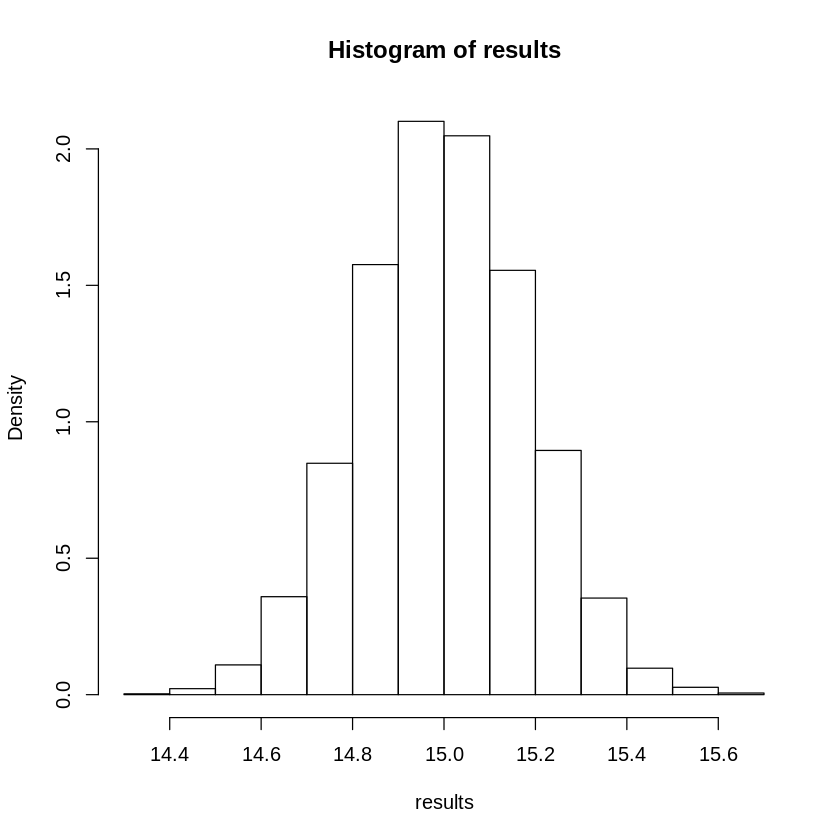

In [1]:
# Run this cell and marvel at the results!
results<-rep(0,10000)
for(i in 1:10000){
samp = runif(1000,5,25)
results[i] = mean(samp)
}

hist(results,prob=T)

We also saw that many maximum likelihood estimators have normal distributions in the limit. This was only claimed for distributions that do not have the parameter defining the support of the distribution. (i.e. No parameters in the indicator!) However, it is also can be true in other cases. Consider a random sample of size 1,000 from the uniform distribution over the interval$(5,\theta)$ distribution. On paper, work out the MLE for $\theta$. Copy the code from the previous cell and paste it into the cell below. Change the code so that you are seeing the distribution of the MLE instead of that of $\overline{X}$. 

Does your simulation suggest that the MLE for $\theta$ for the uniform distribution over $(5,\theta)$ is normally distributed? Save a boolean value `TRUE` into `p2` if your answer is yes, or `FALSE` into `p2` if your answer is no.

In [ ]:
p2 = FALSE

# your code here


In [ ]:
# Hidden Test Cell

# Question 3

**Part A)** Run the next cell to read in the data set called "data1" and to check its dimension.

In [8]:
mydata = read.table("data1")
dim(mydata)

[1] 10000     1

"mydata" is a "data frame" which is essentially a table. Because the dimension is 10,000 by 1, it is a single column of data. In this case it is going to be easier to remove the more complicated table struction and turn it into  a vector. Do you recall how we use the letter c to define a vector? Run the next cell. Notice the check before and after the transformation as to whether or not we have a vector.

In [16]:
is.vector(mydata)
mydata = c(unlist(mydata))
is.vector(mydata)

[1] FALSE

[1] TRUE

In the next cell, make a histogram of the data. Be sure to use "density" on the y-axis. Use the given "breaks" vector. (i.e. use <code> breaks=br</code> in your histogram) Usually you will have to determine the breaks yourself by looking at the minimum and maximum of the data and trying different bin widths. We are giving you a specific vector of breaks here to help with the autograder. We are also giving the histogram a name for the autograder-- usually you would not have anything before "hist" on that line.

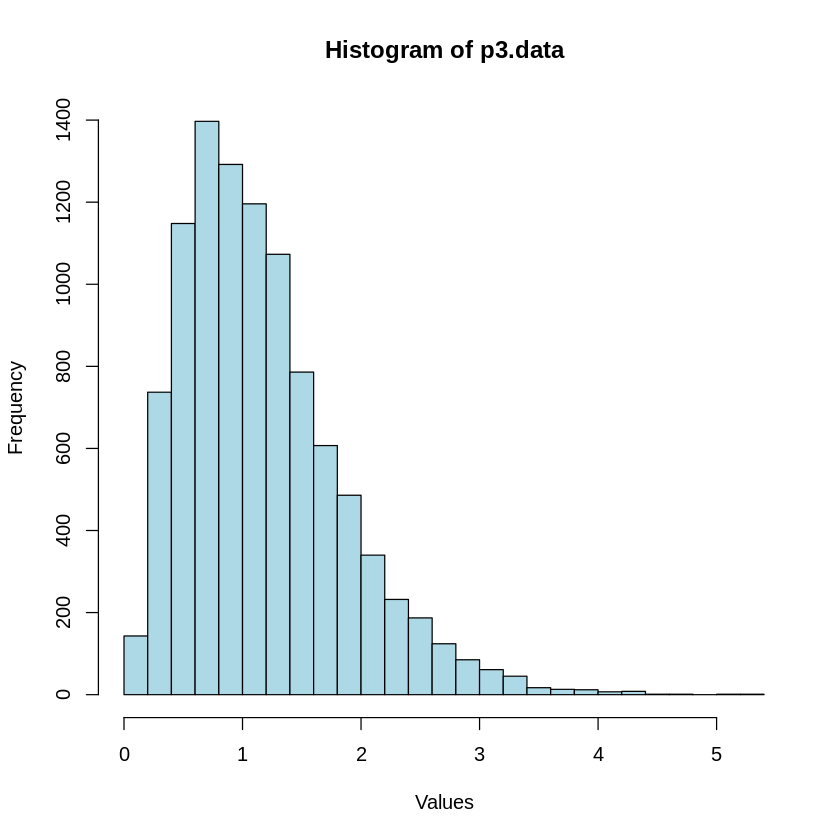

In [18]:
p3.data <- mydata

br <- seq(0, 5.4, 0.2)

p3.hist <- hist(p3.data,
                breaks = br,
                main = "Histogram of p3.data",
                xlab = "Values",
                ylab = "Frequency",
                col = "lightblue",
                border = "black")

In [ ]:
# Hidden Test Cell

**Part B)** From looking at the histogram, we think that it might be a good idea to model the data with a gamma distribution with pdf

$$
f(x) = \frac{1}{\Gamma(\alpha)} \, \beta^{\alpha} \, x^{\alpha-1} \, e^{-\beta x} \, I_{(0,\infty)}(x).
$$

We are going to try to find maximum likelihood estimators for $\alpha$ and $\beta$. Unfortunately, there is no known way to solve for the MLE for $\alpha$ algebraically so we are going to explore the solution numerically.

The log-likelihood (make sure that you agree!) is

$$
\ell (\alpha,\beta) = -n \ln \Gamma(\alpha) + n \alpha \ln \beta + (\alpha-1) \sum \ln x_{i} - \beta \sum x_{i}.
$$

Taking the derivative with respect to $\alpha$ and setting it equal to zero gives us something very messy. Taking the derivative with respect to $\beta$ and setting it equal to zero gives us that
$$
\beta = \frac{\alpha}{\overline{x}}.
$$

Plugging this in to the log-likelihood gives us
$$
\ell(\alpha,\alpha/\overline{x}) = -n \ln \Gamma(\alpha) + n \alpha \ln (\alpha \, / \, \overline{x}) + (\alpha-1) \sum \ln x_{i} - n \alpha.
$$

We can plot this my making a fine sequence of alpha points, evaluating the function at each point, plotting alpha points versus function points, and connecting them with a line/curve. 

In [ ]:
p3.ell = NA

n = 10000
alpha = seq(0,5,0.001)
# Uncomment and finish next line. Your xi are stored in the vector "mydata"
#p3.ell = -n*log(gamma(alpha)) + ...
#plot(alpha,p3.ell,type="l")  # "l" is for line

# your code here


In [ ]:
# Hidden Test Cell

Is the function always increasing or is it starting to dip down at then end? Let's zoom in a little.

In [ ]:
# Run this cell
plot(alpha,p3.ell,type="l",xlim=c(2.5,4),ylim=c(-10000,-8000)) 

Ah, there it is-- a maximum! If you were running R outside of the Jupyter notebook environment, there are ways to interact with the plot. In particular, there is a "locator" function that allows you to click on the plot and have the coordinates of the point you clicked on returned to you. 

Typing <code>max(p3.ell)</code> will return the maximum value in the vector of function values. Typing <code>which.max(p3.ell)</code> will return the vector index where the maximum is located.

In [ ]:
# Run this cell
alpha[which.max(p3.ell)]

Note that the value of $\alpha$ that we have found can only be one of the sequence of points used
to define the vector alpha and the true alpha that maximizes the log-likelihood is
likely in between two points. We can probably do better with the "optimize" function that is built-in to R. For this, we need to define the log-likelihood stored in p3.ell as a function that can be evaluated at arbitrary points. (Currently we have only evaluated it at a sequence of $\alpha$ values.)

In [ ]:
# Run this cell
 myfunction<-function(alpha) -10000*log(gamma(alpha))+10000*alpha*(log(alpha)-log(mean(mydata)))+(alpha-1)*sum(log(mydata))-10000*alpha
optimize(myfunction,lower=2.2,upper=4,maximum=TRUE)

The command <code>points(1,3)</code> will add the point $(1,3)$, for example, to a plot. Go back up to the last plot above and add a point to the plot showing the maximum. 

Finally, remake the original histogram of "mydata" and add the gamma pdf curve using the "lines" command. Remember that $\beta=\alpha/\overline{x}$. If you did everything correctly here you should have fit a pretty nice curve to the "shape" of the data!